**Step1:Loading Google Drive into Colab and dataset**

In [10]:
import warnings
warnings.filterwarnings('ignore')


In [11]:
# Mounting Google Drive
#from google.colab import drive
#drive.mount('/content/drive')


**Loading the dataset**

In [12]:
# Import required libraries
import pandas as pd

# Load CSV dataset
csv_path = '/content/Credit_score_data.csv'
df = pd.read_csv(csv_path)

# Display first few rows to verify loading
print("Credit Score Grading Dataset:")
print(df.head())

Credit Score Grading Dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93

**Step 2 :Dropping Irrelevant columns that will not help us in our analysis**

In [13]:
# Identify irrelevant columns to drop
irrelevant_columns = ['RowNumber', 'CustomerId', 'Surname']

# Drop irrelevant columns from dataframe
DF = df.drop(columns=irrelevant_columns)

# Display the updated dataframe to verify changes
print("DataFrame after dropping irrelevant columns:")
print(DF.head())

DataFrame after dropping irrelevant columns:
   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


**Step 3:Checking For Null Values**

In [14]:
DF.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


## **Step 4:Fill Numerical Nulls (Median)**

In [15]:
# Identify numerical columns
numerical_cols = DF.select_dtypes(include=['int64','float64']).columns

for col in numerical_cols:
    DF[col].fillna(DF[col].median(), inplace=True)

# Display numerical columns identified
print("Numerical Columns:", numerical_cols)

# Summary statistics for numerical columns
numerical_summary = DF[numerical_cols].describe()

# Display summary statistics
print("\nSummary Statistics for Numerical Columns:")
print(numerical_summary)


Numerical Columns: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Summary Statistics for Numerical Columns:
        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary

**Step 5: Fill Categorical Nulls (Mode)**

In [16]:
cat_cols = DF.select_dtypes(include=['object','category']).columns

for col in cat_cols:
    DF[col].fillna(DF[col].mode()[0], inplace=True)

**Step 6: Final Null Check**

In [17]:
DF.isnull().sum()


,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


**Step 7: Identify Numerical Columns + Summary Stats**

In [18]:
numerical_cols = DF.select_dtypes(include=['int64','float64']).columns.tolist()

print("Numerical Columns:", numerical_cols)
DF[numerical_cols].describe()

Numerical Columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Step 8:Standardizing the Numerical Columns Using Robust Scaler to negate the impact of Outliers**

In [19]:
# Import RobustScaler from sklearn
from sklearn.preprocessing import RobustScaler

# Initialize RobustScaler
scaler = RobustScaler()

# Perform robust scaling on numerical columns directly updating DF
DF[numerical_cols] = scaler.fit_transform(DF[numerical_cols])

# Verify scaled DataFrame
print("Data after Robust Scaling:")
print(DF.head())

Data after Robust Scaling:
   CreditScore Geography  Gender       Age  Tenure   Balance  NumOfProducts  \
0    -0.246269    France  Female  0.416667   -0.75 -0.761480            0.0   
1    -0.328358     Spain  Female  0.333333   -1.00 -0.104906            0.0   
2    -1.119403    France  Female  0.416667    0.75  0.489346            2.0   
3     0.350746    France  Female  0.166667   -1.00 -0.761480            1.0   
4     1.477612     Spain  Female  0.500000   -0.75  0.221806            0.0   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0        0.0             0.0         0.011739     1.0  
1       -1.0             0.0         0.125512     0.0  
2        0.0            -1.0         0.139630     1.0  
3       -1.0            -1.0        -0.064717     0.0  
4        0.0             0.0        -0.214561     0.0  


## **Step 9:Identifying all categorical columns**

In [20]:
# Identify categorical columns
categorical_columns = DF.select_dtypes(include=['object', 'category']).columns.tolist()

# Print categorical columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: ['Geography', 'Gender']


**Step 10:Encoding Categorical Columns for Model Building**

**Encoding Geography and Gender column with one-hot encoding**

In [21]:
# Import pandas for encoding
import pandas as pd

# Apply One-Hot Encoding to multiple categorical column
DF_encoded = pd.get_dummies(DF,
                            columns=['Geography','Gender'],
                            drop_first=True)

# Verify the changes
print("DataFrame after one-hot encoding and converting boolean to integer:")
print(DF_encoded.head())

# Convert boolean columns to integer (0 and 1)
bool_cols = ['Geography_Germany', 'Geography_Spain','Gender_Male']
DF_encoded[bool_cols] = DF_encoded[bool_cols].astype(int)

# Verify the changes
print("DataFrame after one-hot encoding and converting boolean to integer:")
print(DF_encoded.head())


DataFrame after one-hot encoding and converting boolean to integer:
   CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.246269  0.416667   -0.75 -0.761480            0.0        0.0   
1    -0.328358  0.333333   -1.00 -0.104906            0.0       -1.0   
2    -1.119403  0.416667    0.75  0.489346            2.0        0.0   
3     0.350746  0.166667   -1.00 -0.761480            1.0       -1.0   
4     1.477612  0.500000   -0.75  0.221806            0.0        0.0   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0             0.0         0.011739     1.0              False   
1             0.0         0.125512     0.0              False   
2            -1.0         0.139630     1.0              False   
3            -1.0        -0.064717     0.0              False   
4             0.0        -0.214561     0.0              False   

   Geography_Spain  Gender_Male  
0            False        False  
1             True        False  
2     

**Step 11:Visualizing the Dataset at a Glance**

1. Clustered Heatmap (Hierarchical Clustering)

<Figure size 2000x1200 with 0 Axes>

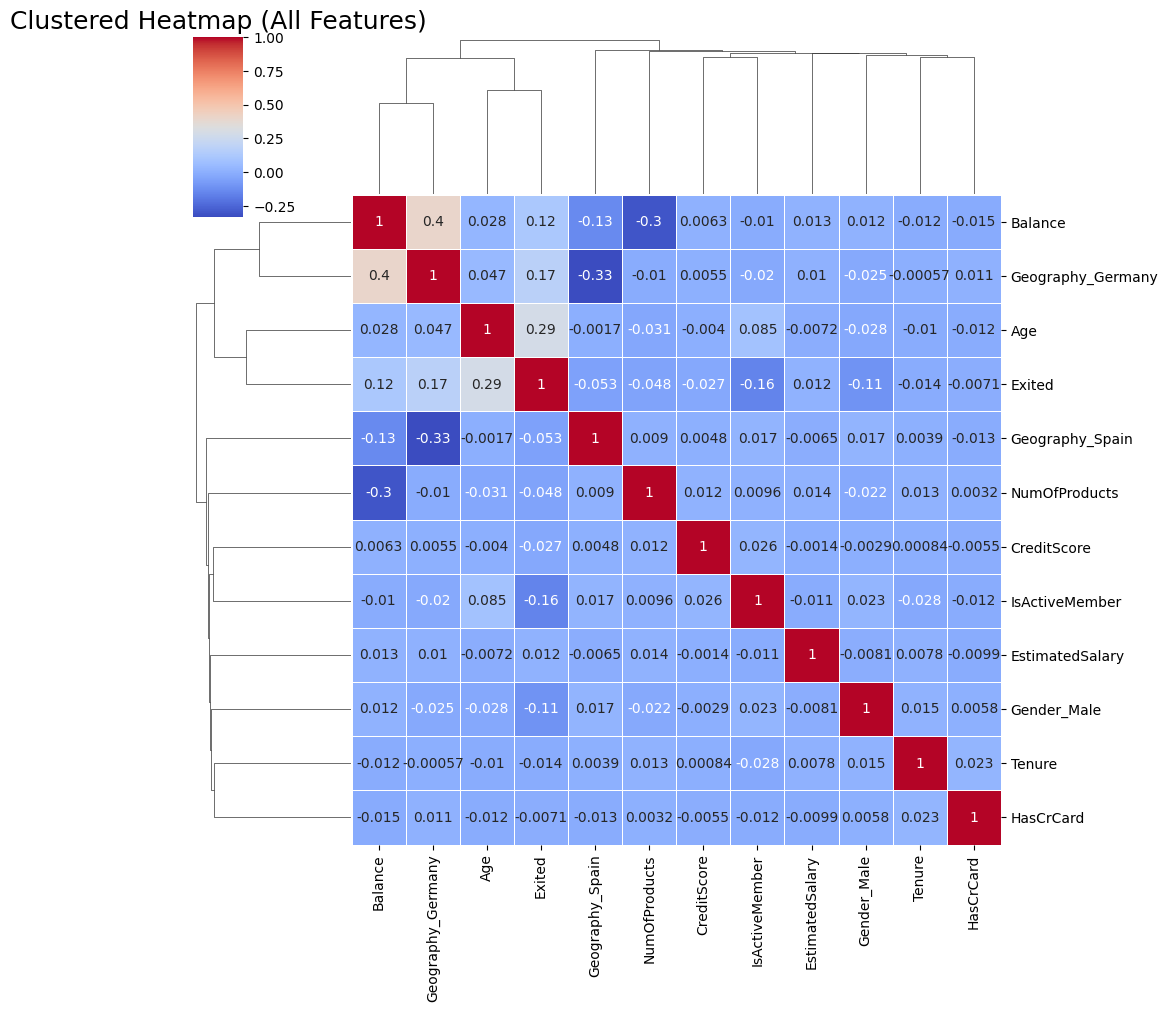

In [22]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size and plot
plt.figure(figsize=(20, 12))
sns.clustermap(DF_encoded.corr(), cmap='coolwarm', annot=True, linewidths=.5)

# Add title
plt.title('Clustered Heatmap (All Features)', fontsize=18)

# Display plot
plt.show()

**Step 12: Interactive Parallel Coordinates Plot**

In [23]:
# Import plotly
import plotly.express as px

# Plot parallel coordinates
fig = px.parallel_coordinates(
    DF_encoded,
    dimensions=DF_encoded.columns,
    color='Exited',
    color_continuous_scale='Viridis',
    labels={col: col for col in DF_encoded.columns},
    title='Interactive Parallel Coordinates Plot of All Features'
)

# Adjust layout and show
fig.update_layout(width=2000, height=1800)
fig.show()

**Step 13: Radial (Spider/Web) Plot of Mean Feature Values**

In [24]:
# Import plotly graph_objects
import plotly.graph_objects as go

# Compute mean of each feature
means = DF_encoded.mean()

# Create Radial plot
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=means.values,
    theta=means.index,
    fill='toself',
    name='Mean Feature Values'
))

# Update layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[means.min()-1, means.max()+1])
    ),
    title='Radial (Spider/Web) Plot of Mean Values Across All Features',
    showlegend=True,
    width=800,
    height=800
)

# Display plot
fig.show()


## **Step 14:Splitting Data and Preparing Data for feature Selection**

In [25]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Define independent variables (X) and dependent variable (y)
X = DF_encoded.drop('Exited', axis=1)
y = DF_encoded['Exited']

# Perform train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # keeps balanced distribution of grades in train/test
)

# Verify the split
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)

Training Data Shape: (7000, 11) (7000,)
Testing Data Shape: (3000, 11) (3000,)


**Step 15:We all perform various Feature Selection techniques and see which one best suits are Dataset**

1. Principal Component Analysis

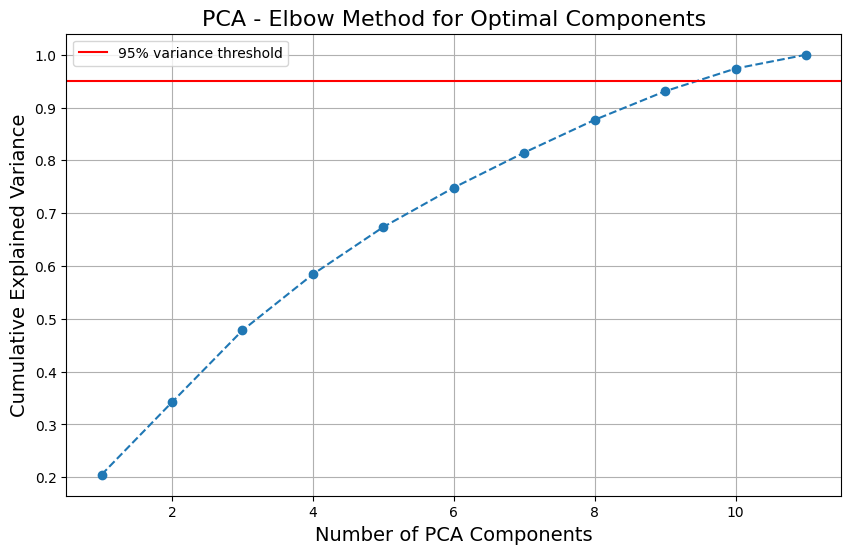

In [26]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Initialize PCA without specifying number of components
pca = PCA()

# Fit PCA on training data
pca.fit(X_train)

# Calculate explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plotting the explained variance (Elbow Method)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')

# Add labels and title
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('PCA - Elbow Method for Optimal Components', fontsize=16)

# Add horizontal line for 90% variance explained
plt.axhline(y=0.95, color='r', linestyle='-', label='95% variance threshold')

# Add legend
plt.legend()

# Display plot
plt.grid()
plt.show()


**Step16:Taking 15 components from the above elbow Method and applying PCA**

In [27]:
# Import necessary libraries
from sklearn.decomposition import PCA

# Apply PCA with chosen number of components (15 components based on the elbow method)
pca = PCA(n_components=10)

# Fit PCA only on training data and transform both train and test
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Check shapes after PCA
print("Training set shape after PCA:", X_train_pca.shape)
print("Test set shape after PCA:", X_test_pca.shape)

Training set shape after PCA: (7000, 10)
Test set shape after PCA: (3000, 10)


**Step 19:Visualizing PCA**

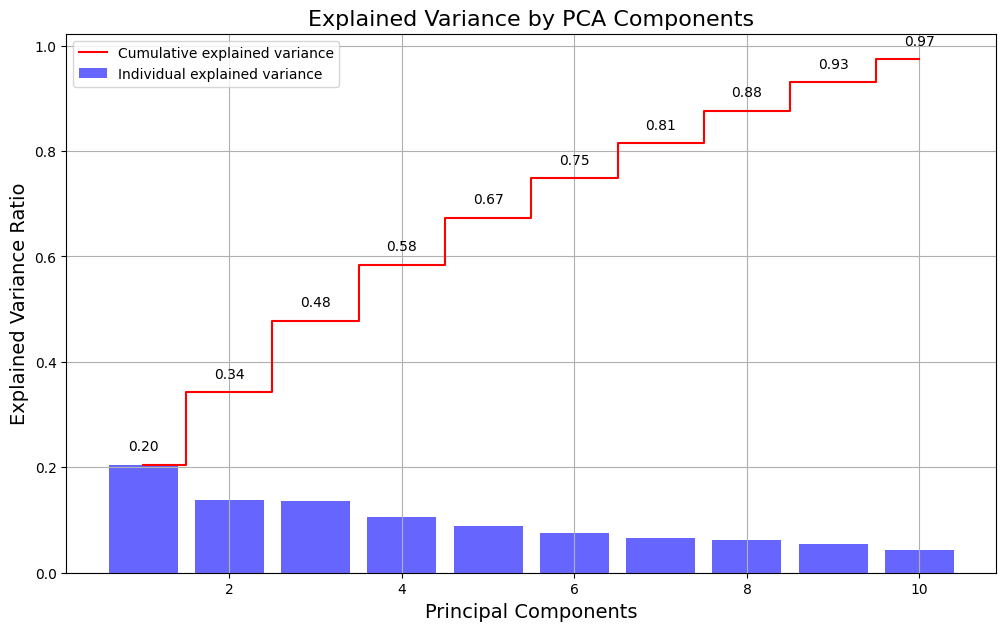

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Explained variance ratio for each PCA component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot
plt.figure(figsize=(12, 7))

# Bar plot for individual explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1),
        explained_variance_ratio,
        alpha=0.6,
        color='b',
        label='Individual explained variance')

# Line plot for cumulative explained variance
plt.step(range(1, len(cumulative_variance_ratio) + 1),
         cumulative_variance_ratio,
         where='mid',
         color='r',
         label='Cumulative explained variance')

# Labels and Title
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.title('Explained Variance by PCA Components', fontsize=16)

# Add annotations for cumulative explained variance values
for i, cumulative_var in enumerate(cumulative_variance_ratio):
    plt.annotate(f"{cumulative_var:.2f}", (i+1, cumulative_var),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.legend(loc='best')
plt.grid()
plt.show()


**We cannot proceed with this method as it choses 15 principal components that compresses our original set of 18 features but looses identity. We cannot annalyze from this what feature has the most contribution towards grades as the principal components themselves are arttifically creaed and lack annalytical meaning.**

**Step 20: Feature Selection Using Lasso Regression or L1 Regularization**

Selected Features after Lasso:
CreditScore         -0.017655
Age                  0.122703
Tenure               0.000210
Balance              0.036639
NumOfProducts       -0.005648
IsActiveMember      -0.132090
EstimatedSalary      0.009952
Geography_Germany    0.129167
Gender_Male         -0.067619
dtype: float64


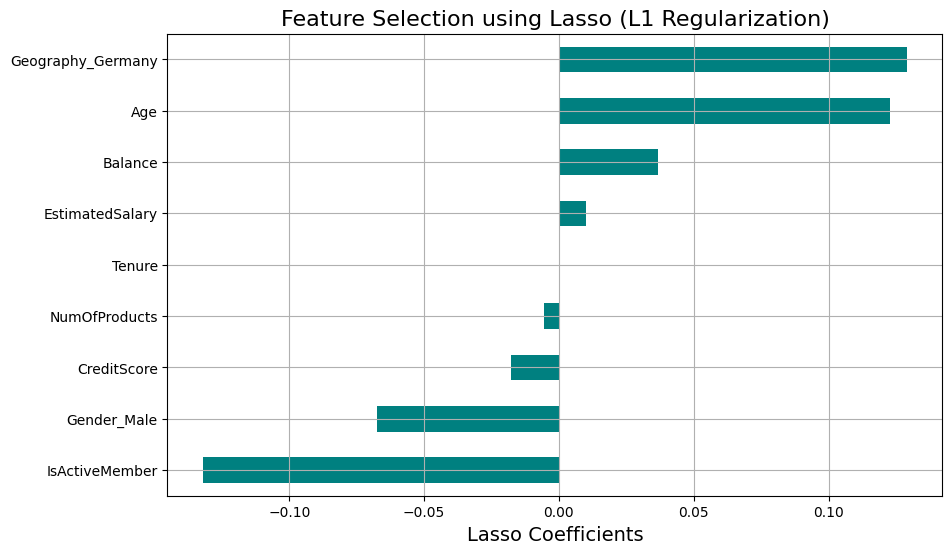

Shape after Lasso Feature Selection:
Training set: (7000, 9)
Testing set: (3000, 9)


In [29]:
# Import necessary libraries
from sklearn.linear_model import LassoCV
import numpy as np
import matplotlib.pyplot as plt

# Initialize Lasso with Cross-validation to automatically find best alpha
lasso = LassoCV(cv=5, random_state=42, max_iter=10000)

# Fit Lasso model to training data
lasso.fit(X_train, y_train)

# Extract feature coefficients
feature_coef = pd.Series(lasso.coef_, index=X_train.columns)

# Identify selected (non-zero) features
selected_features = feature_coef[feature_coef != 0]

# Display selected features
print("Selected Features after Lasso:")
print(selected_features)

# Plotting Feature Importances
plt.figure(figsize=(10,6))
selected_features.sort_values().plot(kind='barh', color='teal')
plt.xlabel("Lasso Coefficients", fontsize=14)
plt.title("Feature Selection using Lasso (L1 Regularization)", fontsize=16)
plt.grid(True)
plt.show()

# Reduce training and testing data to selected features
X_train_lasso = X_train[selected_features.index]
X_test_lasso = X_test[selected_features.index]

# Check shapes after feature selection
print("Shape after Lasso Feature Selection:")
print("Training set:", X_train_lasso.shape)
print("Testing set:", X_test_lasso.shape)

**Though Highly restrictive, This feature selection procedure is not wrong but rather has very high alpha values. This can be adjusted during Hyper-parameter tuning which we will learn while model building. In this case, this method is good but again has extremely high bias.**

**Step 21:Feature Selection using L2 or Ridge Regression**

Features selected by Ridge Regression (L2):
CreditScore         -0.019189
Age                  0.123024
Balance              0.038608
IsActiveMember      -0.133070
EstimatedSalary      0.012323
Geography_Germany    0.130019
Gender_Male         -0.069916
dtype: float64


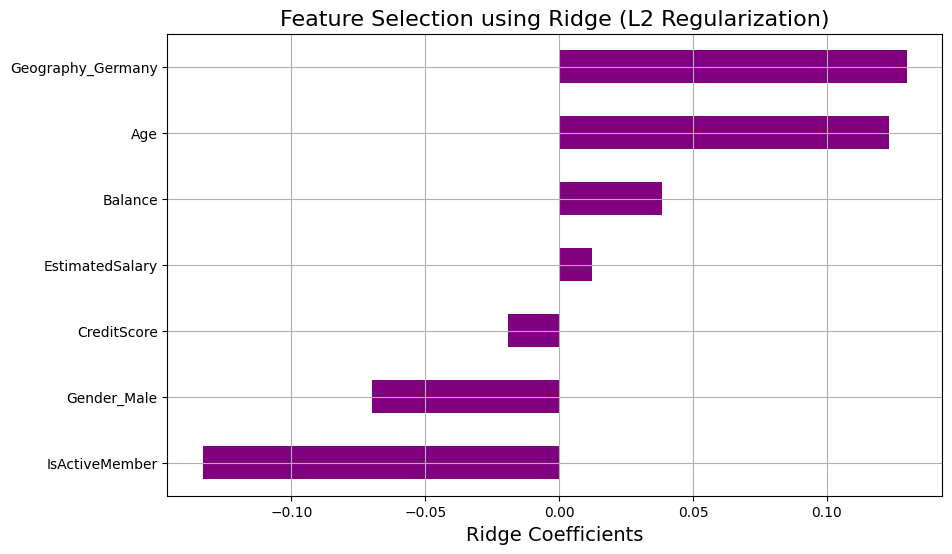

In [30]:
# Import necessary libraries
from sklearn.linear_model import RidgeCV
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Ridge regression with cross-validation to automatically select alpha
ridge = RidgeCV(alphas=np.logspace(-4, 4, 100), cv=5)

# Fit Ridge model to training data
ridge.fit(X_train, y_train)

# Get Ridge coefficients for all features
ridge_coef = pd.Series(ridge.coef_, index=X_train.columns)

# Select features based on coefficient magnitude (e.g., threshold)
ridge_selected_features = ridge_coef[abs(ridge_coef) > 0.01]

# Display features with notable coefficients
print("Features selected by Ridge Regression (L2):")
print(ridge_selected_features)

# Plot feature importance (Ridge Coefficients)
plt.figure(figsize=(10, 6))
ridge_selected_features.sort_values().plot(kind='barh', color='purple')
plt.xlabel("Ridge Coefficients", fontsize=14)
plt.title("Feature Selection using Ridge (L2 Regularization)", fontsize=16)
plt.grid(True)
plt.show()

**This method chooses 11 features, a complete contrast to what we got from Lasso. This is expected given the relationship between the dependent variable and the features is non-linear and these are linear models with linear assumptions.**

**Step 22: Using Random Forest for Feature Selection considering non-linearity in the dataset**

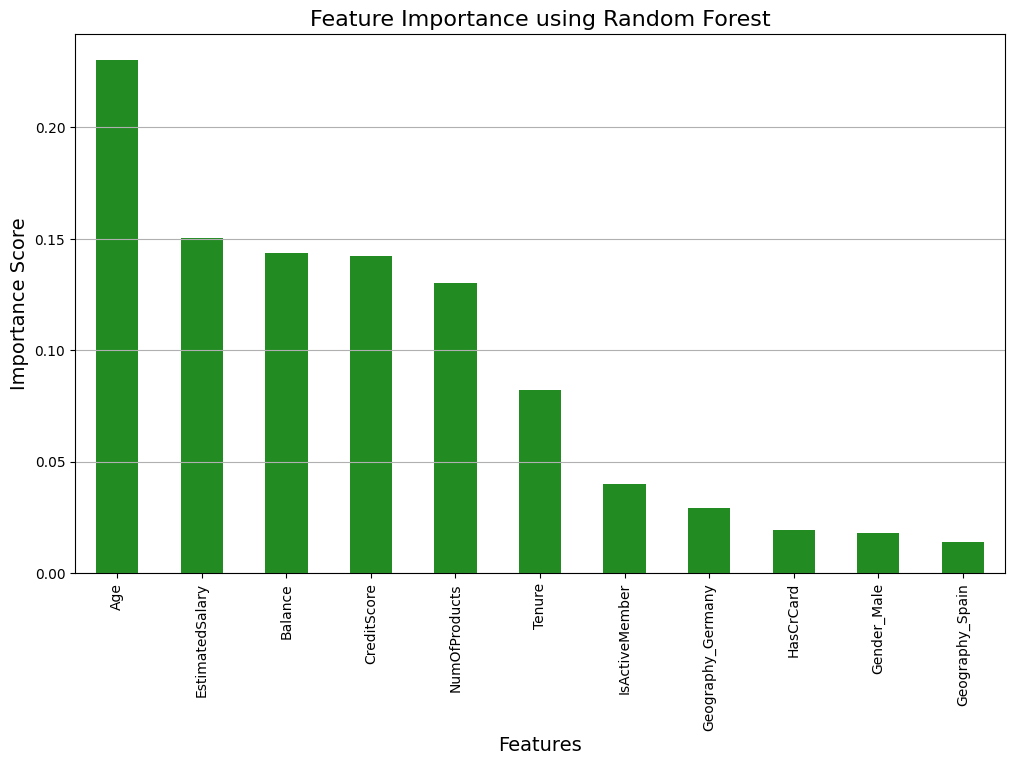

Selected features based on Random Forest importance:
Index(['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary'], dtype='object')
Shape after Random Forest Feature Selection:
Training set: (7000, 5)
Testing set: (3000, 5)


In [31]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on training data
rf_classifier.fit(X_train, y_train)

# Extract feature importances
rf_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)

# Sort importances in descending order
rf_importances_sorted = rf_importances.sort_values(ascending=False)

# Visualize feature importances clearly
plt.figure(figsize=(12, 7))
rf_importances_sorted.plot(kind='bar', color='forestgreen')

# Add titles and labels
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance Score", fontsize=14)
plt.title("Feature Importance using Random Forest", fontsize=16)
plt.grid(axis='y')

# Display plot
plt.show()

# Selecting features based on importance threshold (e.g., mean importance)
importance_threshold = rf_importances.mean()
rf_selected_features = rf_importances[rf_importances >= importance_threshold].index

# Display selected features
print("Selected features based on Random Forest importance:")
print(rf_selected_features)

# Reduce data to selected features
X_train_rf = X_train[rf_selected_features]
X_test_rf = X_test[rf_selected_features]

# Verify shapes after selection
print("Shape after Random Forest Feature Selection:")
print("Training set:", X_train_rf.shape)
print("Testing set:", X_test_rf.shape)

**This Method best summarizes by choosing 10 features and again showing dissimilarity in feature selection proving the curse of dimensionality**

## **Step 23: Visualizing the selected features from the 3 methods**

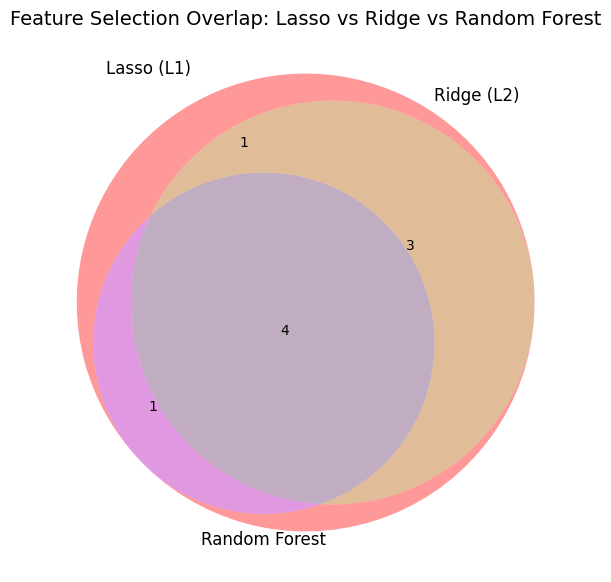

In [32]:
# Install matplotlib-venn if not already installed
!pip install matplotlib-venn --quiet

from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Prepare sets for comparison
set_lasso = set(selected_features.index)
set_ridge = set(ridge_selected_features.index)
set_rf = set(rf_selected_features)

# Plot Venn diagram
plt.figure(figsize=(10, 7))
venn3([set_lasso, set_ridge, set_rf],
      set_labels=('Lasso (L1)', 'Ridge (L2)', 'Random Forest'))

plt.title('Feature Selection Overlap: Lasso vs Ridge vs Random Forest', fontsize=14)
plt.show()

**Step 24: Selecting the Common Features for Robustness and Accuracy**

🔍 Common Features in Ridge and Random Forest:
['Age', 'Balance', 'CreditScore', 'EstimatedSalary']


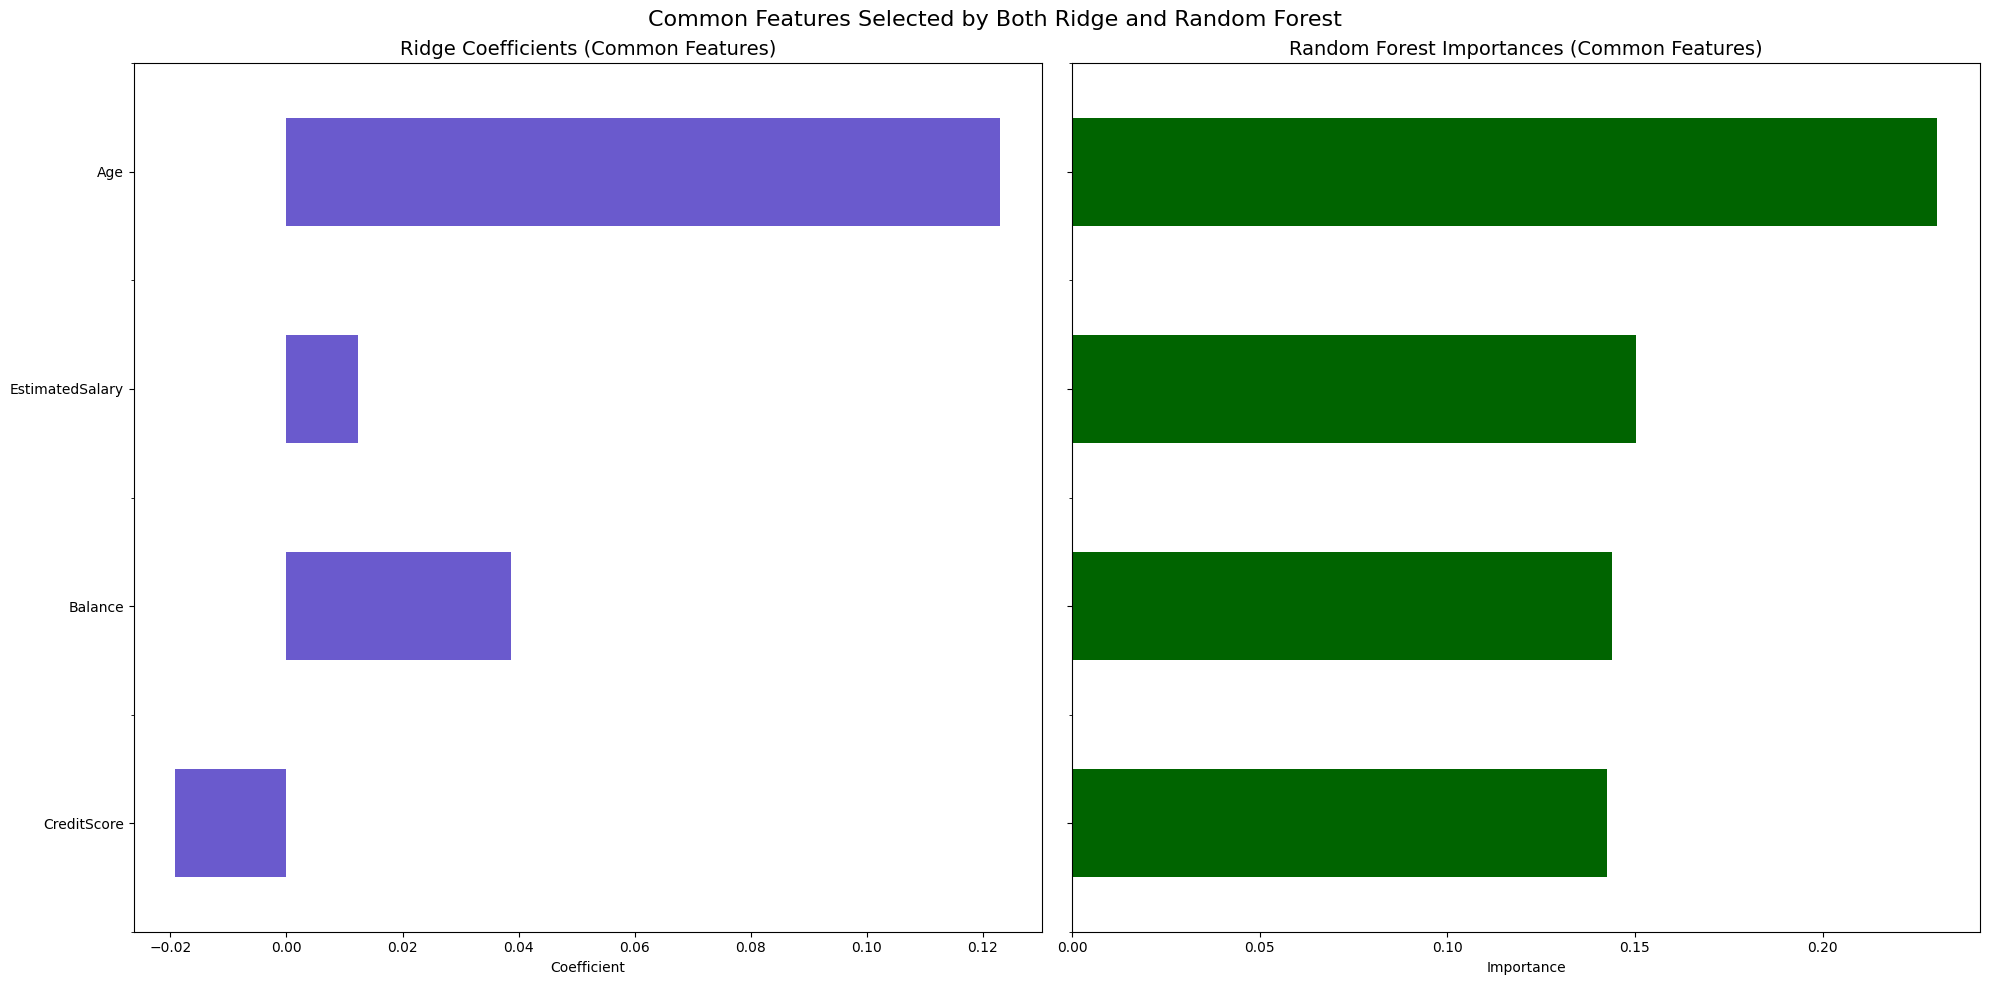

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Get sets of selected features
set_ridge = set(ridge_selected_features.index)
set_rf = set(rf_selected_features)

# Step 2: Find common features
common_features = sorted(list(set_ridge.intersection(set_rf)))

print("🔍 Common Features in Ridge and Random Forest:")
print(common_features)

# Step 3: Prepare data for visualization
ridge_common = ridge_coef[common_features]
rf_common = rf_importances[common_features]

# Combine into a single DataFrame
common_df = pd.DataFrame({
    'Ridge Coefficient': ridge_common,
    'Random Forest Importance': rf_common
}).sort_values(by='Random Forest Importance', ascending=True)

# Step 4: Plot the comparison
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Ridge Coefficients Plot
common_df['Ridge Coefficient'].plot(kind='barh', ax=axes[0], color='slateblue')
axes[0].set_title("Ridge Coefficients (Common Features)", fontsize=14)
axes[0].set_xlabel("Coefficient")

# Random Forest Importances Plot
common_df['Random Forest Importance'].plot(kind='barh', ax=axes[1], color='darkgreen')
axes[1].set_title("Random Forest Importances (Common Features)", fontsize=14)
axes[1].set_xlabel("Importance")

# Final touches
plt.suptitle("Common Features Selected by Both Ridge and Random Forest", fontsize=16)
plt.tight_layout()
plt.show()


**We therefore, select the common features from all three methods giving us both robustness and accuracy by ensembling the result of three methods, 2 linear and contextually opposite and 1 non-linear tree-based algorithm. Bringing the best of both worlds or a Hybrid**